# Age Prediction using NHANES dataset

## Section 1: DATA EXPLORATION

NHANES stands for The National Health and Nutrition Examination Survey, is a survey that administered by the Centers for Disease Control and Prevention (CDC). It aimed to collect extensive health and nutritional information from a diverse U.S. population.

In [1]:
# Import necessary libraries and packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Data Loading

In [2]:
# Load the dataset
demographic = pd.read_csv('/kaggle/input/national-health-and-nutrition-examination-survey/demographic.csv', encoding='latin1')
diet = pd.read_csv('/kaggle/input/national-health-and-nutrition-examination-survey/diet.csv', encoding='latin1')
examination = pd.read_csv('/kaggle/input/national-health-and-nutrition-examination-survey/examination.csv', encoding='latin1')
labs = pd.read_csv('/kaggle/input/national-health-and-nutrition-examination-survey/labs.csv', encoding='latin1')
medications = pd.read_csv('/kaggle/input/national-health-and-nutrition-examination-survey/medications.csv', encoding='latin1')
questionaire = pd.read_csv('/kaggle/input/national-health-and-nutrition-examination-survey/questionnaire.csv', encoding='latin1')

### Extract the relevant variables

Since the dataset contains a lot of features (columns), only those relevant to age prediction or health analysis will be used. The variables and description are as belows:

**SEQN**: sequence number

***Demographic*** <br>
-**RIAGENDR**: gender; 1- male, 2- female <br>
-**RIDAGEYR**: age in years **Individuals 80 and over are topcoded at 80 years of age

***Examination***<br>
-**BPXDI1**, **BPXDI2**, **BPXDI3**: Diastolic blood pressure (mm/Hg)<br>
-**BPXSY**, **BPXSY2**, **BPXSY3**: Systolic blood pressure (mm/Hg)<br>
-**BMXBMI**: BMI index<br>
-**BPXPULS**: Pulse; 1- regular, 2- irregular

***Lab***<br>
-**LBXGLT**: Two Hour Glucose in Oral Glucose Tolerance Test (mg/dL)<br>
-**LBXIN**: Insulin Level (uU/mL)<br>

***Questionaire***<br>
-**DIQ010**: Diagnosed with diabetes; 1- Yes, 2-No, 3-Borderline, 7- Refused, 9- Don't know<br>
-**PAQ715**: Average hours per day use a computer (outside of school/work) ;0- < 1 hr, 1- 1 hr, 2- 2 hrs, 3- 3 hrs, 4- 4 hrs, 5- >= 5 hrs. 8- don't use a computer

In [3]:
# The relevant features columns
demoCols = ['SEQN', 'RIDAGEYR', 'RIAGENDR']
examCols = ['SEQN', 'BPXDI1', 'BPXDI2', 'BPXDI3', 'BPXSY1', 'BPXSY2', 'BPXSY3', 'BMXBMI', 'BPXPULS']
labsCols = ['SEQN','LBXGLT', 'LBXIN']
quesCols = ['SEQN', 'DIQ010', 'PAQ715']

In [4]:
# Merging the DataFrames on 'SEQN'
df = demographic[demoCols] \
    .merge(examination[examCols], on='SEQN', how='left') \
    .merge(labs[labsCols], on='SEQN', how='left') \
    .merge(questionaire[quesCols], on='SEQN', how='left')

In [5]:
# observe first 5 rows of dataframe
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,SEQN,RIDAGEYR,RIAGENDR,BPXDI1,BPXDI2,BPXDI3,BPXSY1,BPXSY2,BPXSY3,BMXBMI,BPXPULS,LBXGLT,LBXIN,DIQ010,PAQ715
0,73557,69,1,72.0,76.0,74.0,122.0,114.0,102.0,26.7,1.0,NaN,NaN,1.0,8.0
1,73558,54,1,62.0,80.0,42.0,156.0,160.0,156.0,28.6,1.0,NaN,NaN,1.0,8.0
2,73559,72,1,90.0,76.0,80.0,140.0,140.0,146.0,28.9,1.0,NaN,5.83,1.0,0.0
3,73560,9,1,38.0,34.0,38.0,108.0,102.0,104.0,17.1,1.0,NaN,NaN,2.0,2.0
4,73561,73,2,86.0,88.0,86.0,136.0,134.0,142.0,19.7,1.0,NaN,6.12,2.0,1.0


In [6]:
# Accessing dataframe basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10175 entries, 0 to 10174
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      10175 non-null  int64  
 1   RIDAGEYR  10175 non-null  int64  
 2   RIAGENDR  10175 non-null  int64  
 3   BPXDI1    7172 non-null   float64
 4   BPXDI2    7409 non-null   float64
 5   BPXDI3    7408 non-null   float64
 6   BPXSY1    7172 non-null   float64
 7   BPXSY2    7409 non-null   float64
 8   BPXSY3    7408 non-null   float64
 9   BMXBMI    9055 non-null   float64
 10  BPXPULS   9511 non-null   float64
 11  LBXGLT    2345 non-null   float64
 12  LBXIN     3093 non-null   float64
 13  DIQ010    9769 non-null   float64
 14  PAQ715    9448 non-null   float64
dtypes: float64(12), int64(3)
memory usage: 1.2 MB


It is known that now the data frame consists of 15 features(columns), 10175 respondents(row). In the next session, data cleaning will be done for invalid data and missing values.

## Section 2: DATA CLEANING

### Unique Count

In [7]:
# Check for unique count
print("The number of unique values in each column are:")
print(df.nunique())

The number of unique values in each column are:
SEQN        10175
RIDAGEYR       81
RIAGENDR        2
BPXDI1         59
BPXDI2         56
BPXDI3         58
BPXSY1         71
BPXSY2         73
BPXSY3         74
BMXBMI        440
BPXPULS         2
LBXGLT        234
LBXIN        1745
DIQ010          5
PAQ715          7
dtype: int64


### Frequency distribution of categorical variables

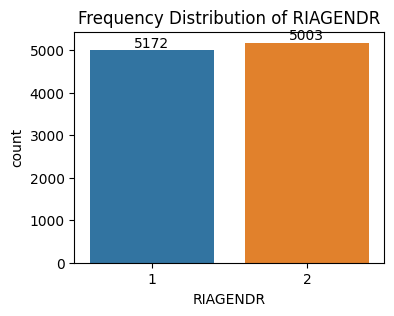

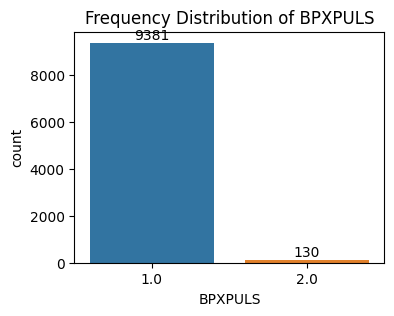

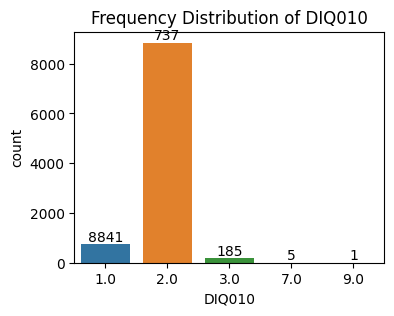

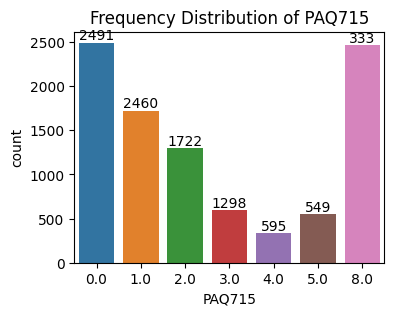

In [8]:
# Plot frequency distribution of the 4 categorical variables
cat = ['RIAGENDR', 'BPXPULS', 'DIQ010', 'PAQ715']
for i in cat:
    plt.figure(figsize=(4, 3))
    ax = sns.countplot(x= i, data=df)
    plt.title(f'Frequency Distribution of {i}')
    # Get absolute values for bar labels
    abs_values = df[i].value_counts(ascending=False).values
    # Add labels to bars
    ax.bar_label(container=ax.containers[0], labels=abs_values)

The frequency distribution plot of categorical variables shows there is no invalid values in the columns. 
Meanwhile for numerical values, boxplot will be plot for detecting outliers or anomalies. Before plotting, the average of three diastolic and systolic blood pressure will be computed to obtain only one value for diastolic and systolic respectively.

### Averaging blood pressure columns

In [9]:
import statistics
# Compute average diastolic blood pressure
df['BPXDI'] = df[['BPXDI1', 'BPXDI2', 'BPXDI3']].mean(axis=1) # perform on columns
df['BPXSY'] = df[['BPXSY1', 'BPXSY2', 'BPXSY3']].mean(axis=1)

In [10]:
# save a new dataframe without original three diastolic and three systolic blood pressure
df2 = df.drop(columns = df[['BPXDI1', 'BPXDI2', 'BPXDI3', 'BPXSY1', 'BPXSY2', 'BPXSY3']], axis = 1)

### Boxplot of numerical variables

<Axes: >

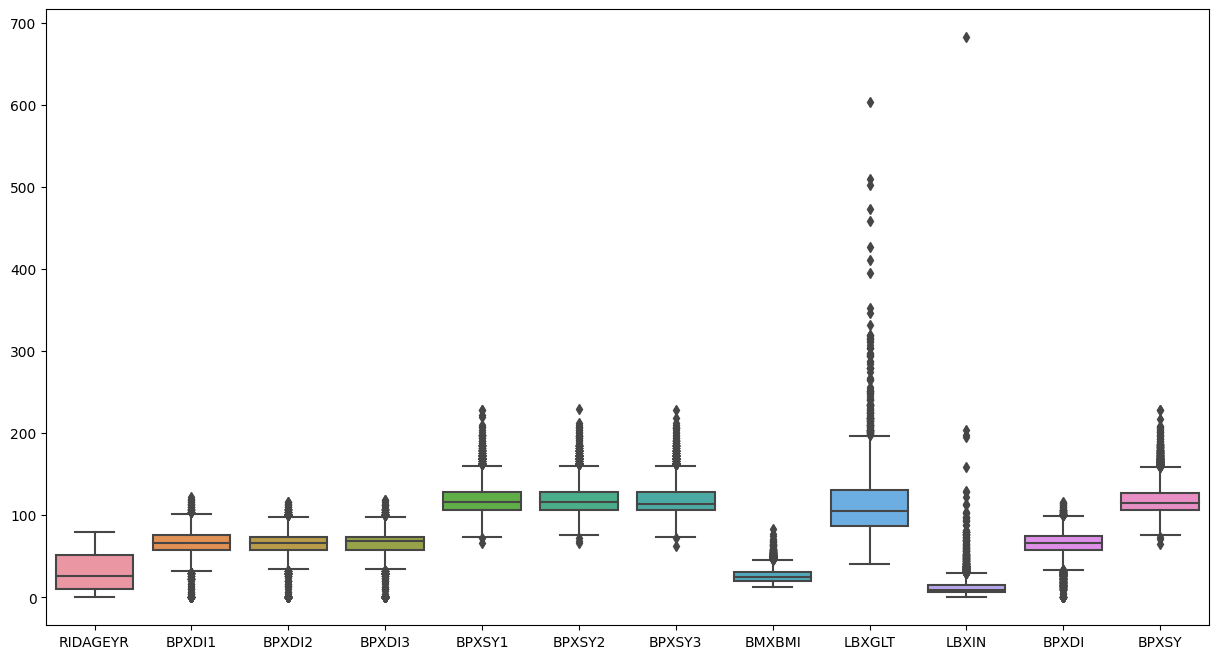

In [11]:
figure = plt.figure(figsize=(15,8))
sns.boxplot(data=df.drop(columns =df[['RIAGENDR', 'BPXPULS', 'DIQ010', 'PAQ715', 'SEQN']]))

From the boxplot, it can ve observed that for LBXIN, there is a very obvious outlier, which located very far away from each other. It will be removed.

In [12]:
# the maximum value in LBXIN
df2['LBXIN'].max() 
# access the index of the outlier
df2[df2['LBXIN']== df2['LBXIN'].max()].index

Index([8329], dtype='int64')

In [13]:
# remove the outlier row
df2 = df2.drop(8329)
# check again the maximum value
df2['LBXIN'].max() 

203.27

### Missing values

In [14]:
# Check for missing values
print("The number of missing values in each column are:")
print(df2.isnull().sum())

The number of missing values in each column are:
SEQN           0
RIDAGEYR       0
RIAGENDR       0
BMXBMI      1120
BPXPULS      664
LBXGLT      7829
LBXIN       7082
DIQ010       406
PAQ715       727
BPXDI       2648
BPXSY       2648
dtype: int64


Observed for LBXGLT and LBXIN, the glucose and insulin level contains more than 7000 missing values. The imputation for such large number of missing values may cause the results become not reliable. Hence, all the rows with missing values are removed.

In [15]:
# Drop all the missing values
df3 = df2.dropna()

In [16]:
# print the new data frame
df3

,SEQN,RIDAGEYR,RIAGENDR,BMXBMI,BPXPULS,LBXGLT,LBXIN,DIQ010,PAQ715,BPXDI,BPXSY
7,73564,61,2,35.7,1.0,150.0,14.91,2.0,0.0,80.666667,122.666667
11,73568,26,2,20.3,1.0,80.0,3.85,2.0,8.0,62.666667,104.666667
19,73576,16,1,23.2,1.0,68.0,6.14,2.0,0.0,66.666667,109.333333
20,73577,32,1,28.9,1.0,84.0,16.15,2.0,8.0,75.333333,119.333333
23,73580,38,2,35.9,1.0,81.0,10.92,2.0,0.0,75.000000,121.000000
...,...,...,...,...,...,...,...,...,...,...,...
10154,83711,38,2,33.5,1.0,73.0,6.53,2.0,1.0,75.000000,110.000000
10155,83712,61,1,30.0,1.0,208.0,13.02,2.0,0.0,74.000000,125.333333
10156,83713,34,1,23.7,1.0,124.0,21.41,2.0,2.0,68.666667,114.666667
10161,83718,60,2,27.4,1.0,108.0,4.99,2.0,0.0,69.333333,116.000000


The dataframe now contain only 2233 respondents. We will check missing values again.

In [17]:
print("The number of missing values in each column are:")
print(df3.isnull().sum())

The number of missing values in each column are:
SEQN        0
RIDAGEYR    0
RIAGENDR    0
BMXBMI      0
BPXPULS     0
LBXGLT      0
LBXIN       0
DIQ010      0
PAQ715      0
BPXDI       0
BPXSY       0
dtype: int64


## Section 3: EXPLANATORY DATA ANALYSIS

### Quantitative Variables

In [18]:
# Measures of central tendency and dispersion
# add in median and skewness to the descriptive table
dataDescribe = df3[['RIDAGEYR', 'BMXBMI', 'LBXGLT', 'LBXIN', 'BPXDI', 'BPXSY']].describe()
dataDescribe.loc['median'] = df3[['RIDAGEYR', 'BMXBMI', 'LBXGLT', 'LBXIN', 'BPXDI', 'BPXSY']].median()
dataDescribe.loc['skewness'] = df3[['RIDAGEYR', 'BMXBMI', 'LBXGLT', 'LBXIN', 'BPXDI', 'BPXSY']].skew()
dataDescribe

,RIDAGEYR,BMXBMI,LBXGLT,LBXIN,BPXDI,BPXSY
count,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000
mean,41.696820,27.948589,114.705329,11.857833,66.243917,119.053739
std,20.136894,7.241698,46.844324,9.758042,13.225543,16.605221
min,12.000000,14.500000,40.000000,0.140000,0.000000,64.666667
25%,23.000000,22.800000,86.000000,5.820000,59.333333,107.333333
50%,41.000000,26.800000,105.000000,9.050000,67.000000,116.000000
75%,58.000000,31.200000,130.000000,14.450000,74.666667,127.333333
max,80.000000,70.100000,604.000000,102.290000,116.666667,216.666667
median,41.000000,26.800000,105.000000,9.050000,67.000000,116.000000
skewness,0.243978,1.340036,2.948171,2.782706,-0.901065,1.079018


According to the table, `LBXGLT` has a large standard deviation. This matched with the boxplot that showing many outliers in `LBXGLT`. From skewness,`RIDAGEYR` is approximately symmetric, while only `BPXDI` is slightly skewed to the left, indicating more respondents have higher value of diastolic blood pressure. The other variables have a right skewed distribution, demontsrated by skewness of > 1.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

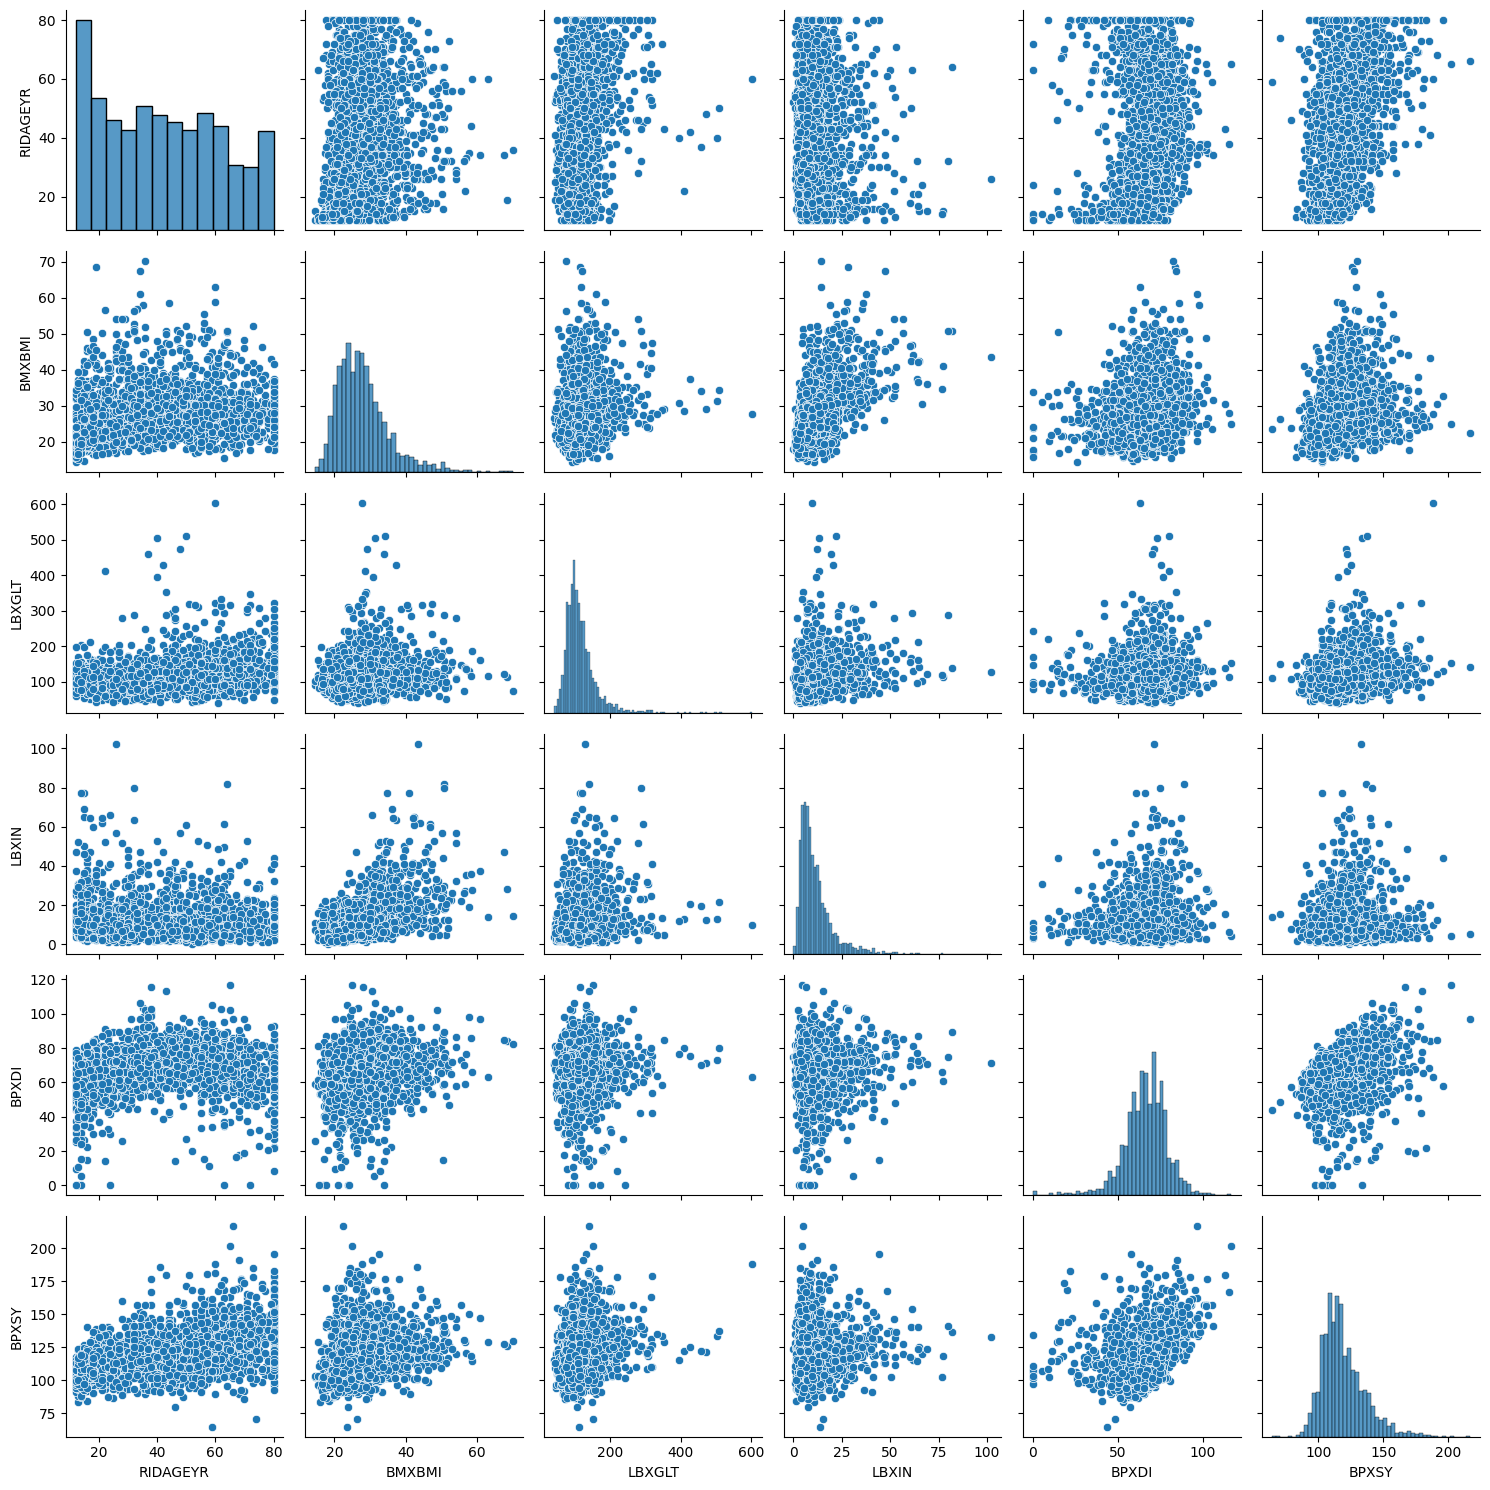

In [19]:
# pairplot 
fig = sns.pairplot(df3[['RIDAGEYR', 'BMXBMI', 'LBXGLT', 'LBXIN', 'BPXDI', 'BPXSY']])
plt.tight_layout()
plt.show()

For numerical variable, pairplot can be used to visualize the distribution of each variable (via histogram), together with the pairwise relationship with other variables. As shown below, BPXSY has a linear relationship with BPXDI. For the other variables, there is no obvious linear or polynomial relationship between each other. The data points are either distributed evenly vertically or horizontally.

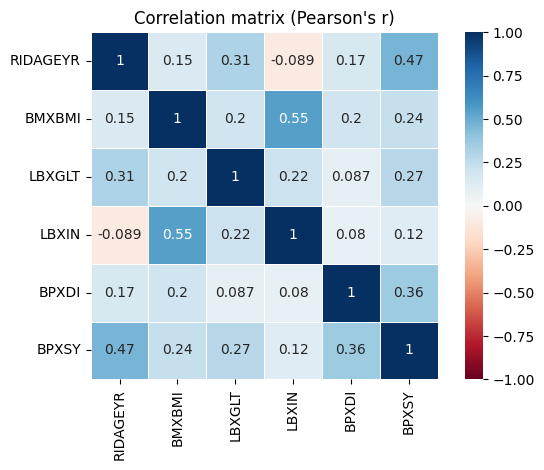

In [20]:
# Correlation matrix
ax = sns.heatmap(
    df3[['RIDAGEYR', 'BMXBMI', 'LBXGLT', 'LBXIN', 'BPXDI', 'BPXSY']].corr(),
    vmin=-1,
    vmax=1,
    square=True,
    linewidth=0.5,
    cmap="RdBu",
    annot=True,
)
ax.set(title="Correlation matrix (Pearson's r)")

plt.tight_layout()
plt.show()



All the variables are not strongly correlated by each other, since the highest correlation is only 0.55, corresponded by BMXBMI and LBXIN, which they are having positive and reasonably strong correlation between each other. Surprisingly, BPXSY and BPXDI pair has only 0.36 of correlation, indicate weak correlation between systolic and diastolic blood pressure.

### Categorical Variables

In [21]:
# Indicate values with respective categorical labels by creating dictionary for each variable
gender = {1:'Male', 2:'Female'}
pulse = {1: 'Regular', 2:'Irregular'}
computerUsage = {0: '< 1hr', 1: '1hr', 2: '2hrs', 3: '3hrs', 4: '4hrs', 5: '>= 5hrs', 8: 'Dont use'}
diabetes = {1: 'Yes', 2: 'No', 3:'Borderline', 7:'Refused', 9:'Dont Know'}

# map the label to a new column respectively
df3['gender'] = df3['RIAGENDR'].map(gender)
df3['pulse']= df3['BPXPULS'].map(pulse)
df3['computerUsage']= df3['PAQ715'].map(computerUsage)
df3['diabetes']= df3['DIQ010'].map(diabetes)

<ipython-input-21-b4e9758f90d5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['gender'] = df3['RIAGENDR'].map(gender)
<ipython-input-21-b4e9758f90d5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['pulse']= df3['BPXPULS'].map(pulse)
<ipython-input-21-b4e9758f90d5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [22]:
# Combine all the basic statistics into a dataframe
catStat = {
    'Count': df3[[ 'gender', 'pulse', 'computerUsage', 'diabetes']].count(),
    'Unique': df3[[ 'gender', 'pulse', 'computerUsage', 'diabetes']].nunique(),
    'Mode': df3[[ 'gender', 'pulse', 'computerUsage', 'diabetes']].mode().iloc[0],
    'ModeCount': df3[[ 'gender', 'pulse', 'computerUsage', 'diabetes']].apply(lambda x: x.value_counts().iloc[0])
}
catstatdf = pd.DataFrame(catStat)
catstatdf['ModeProportion'] = catstatdf['ModeCount']/catstatdf['Count']
catstatdf

,Count,Unique,Mode,ModeCount,ModeProportion
gender,2233,2,Female,1138,0.509628
pulse,2233,2,Regular,2193,0.982087
computerUsage,2233,7,< 1hr,584,0.261532
diabetes,2233,3,No,2158,0.966413


From the basic statistics table, in terms of `gender`, the sample are balance, with 50% of male and 50% of female. Most of the respondents(98%) are having regular pulse, and most of the respondents(97%) are not diagnosed with diabetes. Next, 30% of repsondents only use computer with less than 1 hour outside of school and work.

In [23]:
pd.crosstab(
    df3['gender'], df3['pulse'],
    margins=True,
    normalize=True,
)

pulse,Irregular,Regular,All
gender,,,
Female,0.006270,0.503359,0.509628
Male,0.011644,0.478728,0.490372
All,0.017913,0.982087,1.000000


From the contigency table, more male have irregular pulse than female.

### Variables vs Age

Since we will do age prediction later, it is better to know how age affected categorical variables.

#### Pulse Regular Vs Age

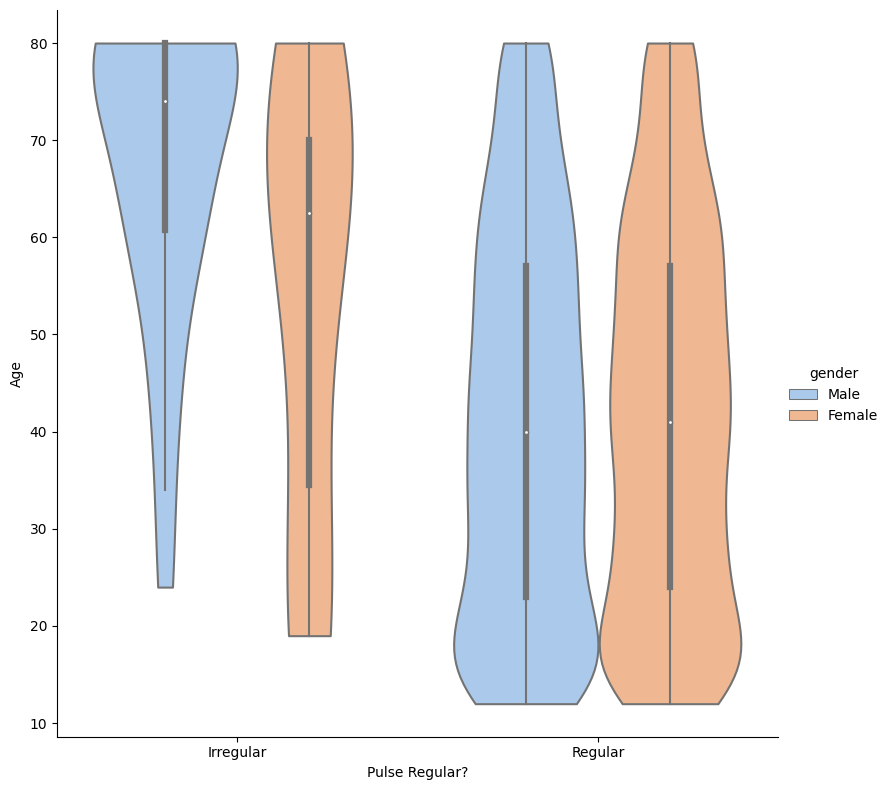

In [24]:
fig = sns.catplot(
    x="pulse",
    y="RIDAGEYR",
    hue="gender",
    kind = "violin",
    data= df3.sort_values("pulse"),
    inner = "boxplot",
    cut = 0,
    height=8,
    palette="pastel",
)
plt.xlabel('Pulse Regular?')
plt.ylabel('Age')
plt.show()

For both female and male, the distribution of age are higher for those have irregular pulse, as compared to those have regular pulse. Person below 20 are unlikely to have irregular pulse.<br>
In addition, as for irregular pulse respondents, the female respondents are quite evenly distributed between age 20 to 80. As for comparisons, the male who have irregular pulse is more heavily distributed in the range of age 70 to 80.

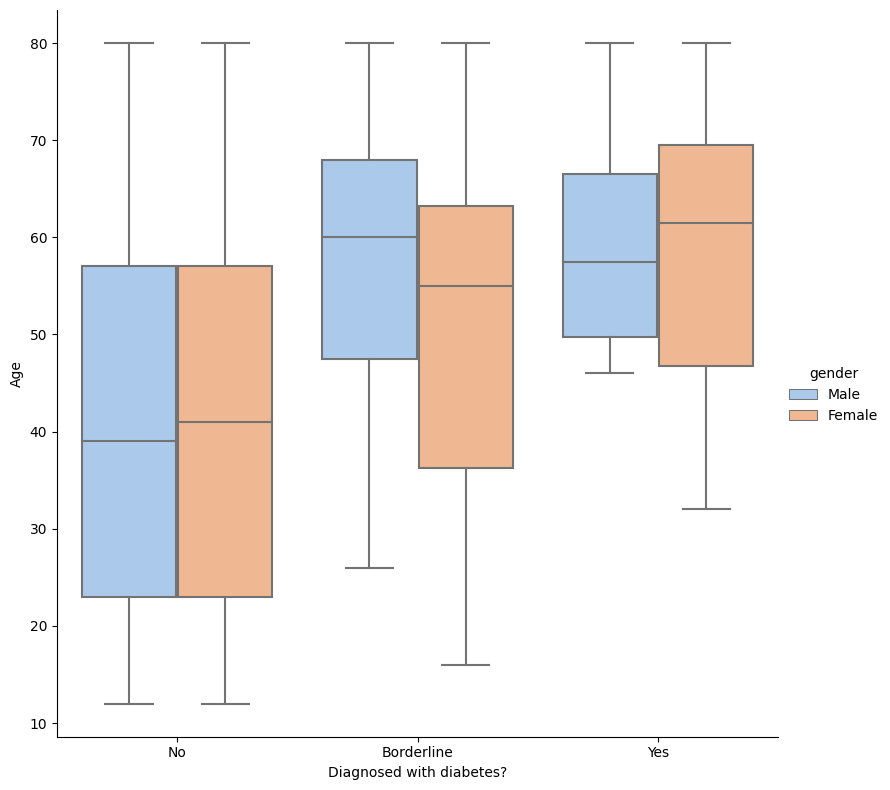

In [25]:
fig = sns.catplot(
    x="diabetes",
    y="RIDAGEYR",
    hue="gender",
    kind = "box",
    data= df3.sort_values("pulse"),
    height=8,
    palette="pastel",
)
plt.xlabel('Diagnosed with diabetes?')
plt.ylabel('Age')
plt.show()

For the respondents who are in borderline to diabetes, female aged smaller than the male. This implies that female may need to be careful for the diabetes at a younger age, conpared to man. This can be demonstrated as well in those had already diagnosed with diabetes, as known as 'Yes' category, range of age of female that diagnosed with diabetes are wider than the male. However, noticed that median age of female diabetes patient (more than 60) is slightly elder than male diabetes (less than 60).

## Section 4: CLASSIFICATION OF AGE GROUP

Instead of predicting the exact age of respondent, it is better to predict age group. Hence, the respondent will be categorized into age groups as belows:<br>
**Children-Youth**- 0-24 years <br>
**Adults**- 25-64 years<br>
**Seniors**- 65 years and elder

In [26]:
# Create age group dictionary
ageGroup = {'Children-Young Adults': range(0,41), 
           'Adults-Seniors': range(41,81)}
# Map the age into ageGroup, the new column
# Function to map age
def map_age_group(age):
    for group, age_range in ageGroup.items(): #.items() returns key-value pairs as tuples
        if age in age_range:  # Check if age is in the given range
            return group
    return 'Unknown'

df3['ageGroup'] = df3['RIDAGEYR'].apply(map_age_group)

<ipython-input-26-77046dbebe24>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['ageGroup'] = df3['RIDAGEYR'].apply(map_age_group)


[Text(0, 0, '1121'), Text(0, 0, '1112')]

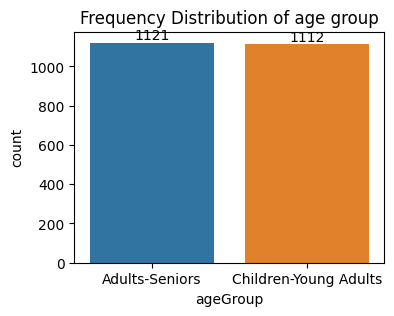

In [27]:
plt.figure(figsize=(4, 3))
ax = sns.countplot(x= df3['ageGroup'], data=df3)
plt.title('Frequency Distribution of age group')
abs_values = df3['ageGroup'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)

### Supervised learning Algorithm

In [28]:
# Remove column RIDAGEYR, SEQN from the dataset for classification
df3_trim = df3.drop(columns = df3[['RIDAGEYR', 'SEQN','gender', 'pulse', 'computerUsage', 'diabetes']], axis = 1)

In [29]:
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

In [30]:
# Load features and target
features = df3_trim.drop(columns = 'ageGroup')
target= df3_trim["ageGroup"]

In [31]:
# Split the dataset into 80% training set and 20% test set
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    features, target, test_size=0.2, random_state=123)

In [32]:
print("The training set shape is", X_train.shape, "and The test set shape is", X_test.shape)

The training set shape is (1786, 9) and The test set shape is (447, 9)


### Gaussian Naive Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB

In [34]:
#Create GNB object
classiferGNB = GaussianNB()

#Train model with GNB
modelGNB = classiferGNB.fit(X_train,y_train)

#Make prediction on test set
predictGNB= modelGNB.predict(X_test)

#Target probabilities
targetProbGNB= modelGNB.predict_proba(X_test)[:,1]

In [35]:
#Print the classification metric for evaluation
print(classification_report(y_test, predictGNB))

                       precision    recall  f1-score   support

       Adults-Seniors       0.89      0.43      0.58       241
Children-Young Adults       0.58      0.94      0.72       206

             accuracy                           0.66       447
            macro avg       0.74      0.68      0.65       447
         weighted avg       0.75      0.66      0.64       447



### K Nearest Neighbours

In [36]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [37]:
scaler = preprocessing.MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
modelKNN = KNeighborsClassifier(n_neighbors=10)

#Train the model using KNN with scaled data
modelKNN.fit(X_train_scaled,y_train)

#Make prediction
predictKNN = modelKNN.predict(X_test_scaled)

#Target Probabilities
targetProbKNN= modelKNN.predict_proba(X_test_scaled)[:,1]

print(classification_report(y_test, predictKNN))

                       precision    recall  f1-score   support

       Adults-Seniors       0.75      0.78      0.76       241
Children-Young Adults       0.73      0.70      0.71       206

             accuracy                           0.74       447
            macro avg       0.74      0.74      0.74       447
         weighted avg       0.74      0.74      0.74       447



### Support Vector Machines (SVM)

In [39]:
from sklearn.svm import SVC
from sklearn import metrics

In [40]:
params = {'kernel':'linear'}
modelSVM = SVC(**params, gamma='auto', probability = True)

modelSVM.fit(X_train,y_train)

predictSVM = modelSVM.predict(X_test)

targetProbSVM= modelSVM.predict_proba(X_test)[:,1]

print(classification_report(y_test, predictSVM))

                       precision    recall  f1-score   support

       Adults-Seniors       0.82      0.66      0.74       241
Children-Young Adults       0.68      0.83      0.75       206

             accuracy                           0.74       447
            macro avg       0.75      0.75      0.74       447
         weighted avg       0.76      0.74      0.74       447



### Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
# Implement logistic regression model
modelLog = LogisticRegression(solver = "liblinear")

modelLog.fit(X_train, y_train)

predictLog = modelLog.predict(X_test)

targetProbLog= modelLog.predict_proba(X_test)[:,1]

print(classification_report(y_test, predictLog))

                       precision    recall  f1-score   support

       Adults-Seniors       0.80      0.68      0.73       241
Children-Young Adults       0.68      0.80      0.73       206

             accuracy                           0.73       447
            macro avg       0.74      0.74      0.73       447
         weighted avg       0.74      0.73      0.73       447



### Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

In [44]:
# Fit to Decision Tree Classifier with 4 questions asked
ModelDT = DecisionTreeClassifier(criterion='entropy',max_depth=4, random_state=0) #max_depth=total ques asked

ModelDT.fit(X_train,y_train)

predictDT = ModelDT.predict(X_test)

targetProbDT= ModelDT.predict_proba(X_test)[:,1]

print(classification_report(y_test, predictDT))

                       precision    recall  f1-score   support

       Adults-Seniors       0.80      0.61      0.69       241
Children-Young Adults       0.64      0.82      0.72       206

             accuracy                           0.70       447
            macro avg       0.72      0.71      0.70       447
         weighted avg       0.73      0.70      0.70       447



### Random Forest

In [45]:
modelRC = RandomForestClassifier()

modelRC.fit(X_train,y_train)

predictRC = modelRC.predict(X_test)

targetProbRC= modelRC.predict_proba(X_test)[:,1]

print(classification_report(y_test, predictRC))

                       precision    recall  f1-score   support

       Adults-Seniors       0.80      0.74      0.77       241
Children-Young Adults       0.72      0.78      0.75       206

             accuracy                           0.76       447
            macro avg       0.76      0.76      0.76       447
         weighted avg       0.76      0.76      0.76       447



### ROC Curve

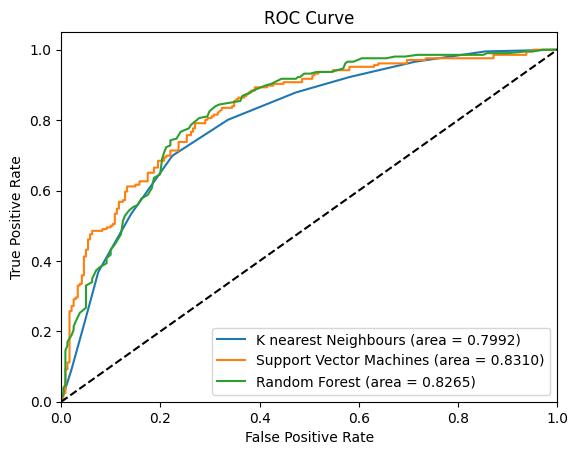

In [46]:
def plot_roc_curve(y_test, y_pred_prob, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob, pos_label='Children-Young Adults')  # Specify the positive class
    plt.plot(fpr, tpr, label=f"{model_name} (area = {roc_auc_score(y_test, y_pred_prob):.4f})")

plt.figure()
plot_roc_curve(y_test, targetProbKNN, "K nearest Neighbours")
plot_roc_curve(y_test, targetProbSVM, "Support Vector Machines")
plot_roc_curve(y_test, targetProbRC, "Random Forest")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Generally, the supervised learning models are better in predicting Adults-Senior group, particularly Gaussian Naive Bayes with 0.89 of precision in predicting Adults-Senior group, depsite of its lowest accuracy among all models. KNN, SVM and Random Forest do the best among all models by having accuracy of 0.75, 0.74 and 0.74 respectively. However, according to ROC curve, which summarize the trade off between the sensitivity and specificity, SVM performed the best, then followed by Random Forest, then only K nearest Neighbours.

### REFERENCES

1. http://wwwn.cdc.gov/nchs/nhanes/search/variablelist.aspx?Component=Demographics&Cycle=2013-2014
2. https://seaborn.pydata.org/generated/seaborn.catplot.html